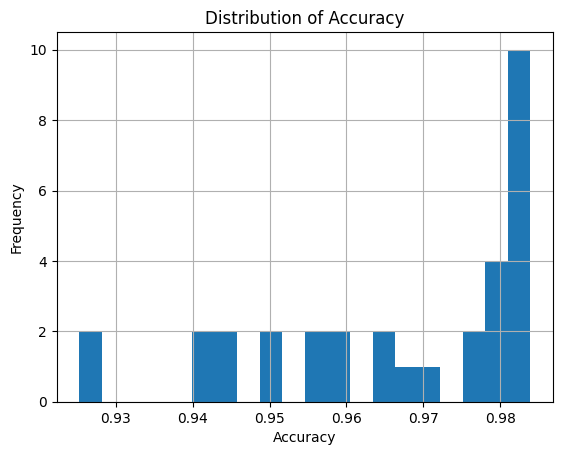

Best Accuracy: 0.9839
Best Hyperparameters: [(256, 64, 'adam', 15)]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 파라미터 설정
layer_sizes = [128, 256]
batch_sizes = [32, 64]
optimizers = ['adam', 'sgd']
epochs_list = [5, 10, 15, 20]

results = {}  # 결과 저장을 위한 딕셔너리

for layer_size in layer_sizes:
    for batch_size in batch_sizes:
        for optimizer in optimizers:
            for epochs in epochs_list:
                # 모델 생성
                model = tf.keras.models.Sequential([
                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                    tf.keras.layers.Dense(layer_size, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(10)
                ])

                # 모델 컴파일
                model.compile(optimizer=optimizer,
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=['accuracy'])

                # 모델 훈련
                model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

                # 모델 평가
                _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

                # 결과 기록
                result_key = (layer_size, batch_size, optimizer, epochs)
                results[result_key] = test_accuracy

# 결과 도표화
accuracies = list(results.values())
plt.hist(accuracies, bins=20)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy')
plt.grid(True)
plt.show()

# 파라미터의 변화에 따른 출력과 정확도
best_accuracy = max(accuracies)
best_hyperparameters = [key for key, value in results.items() if value == best_accuracy]
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Hyperparameters: {best_hyperparameters}")
